In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()


Saving classification_dataset.csv to classification_dataset.csv


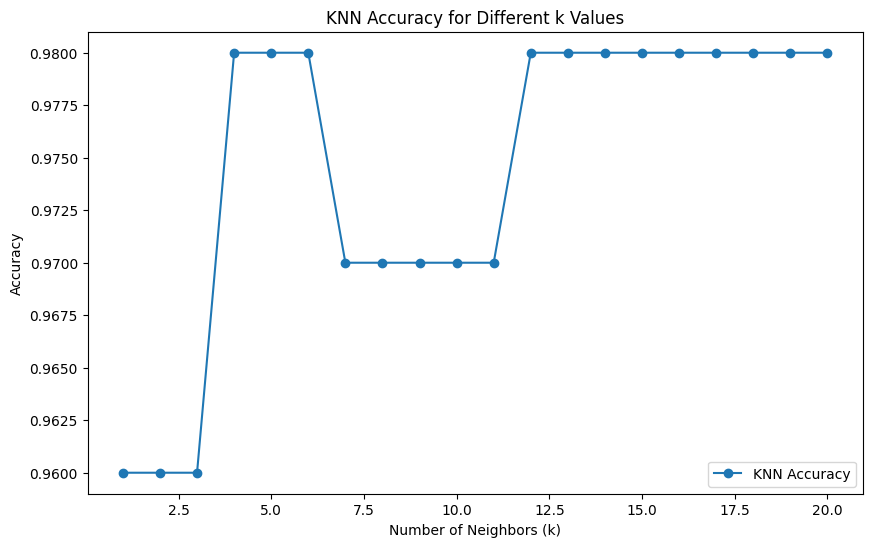

Optimal k for KNN: 4
Decision Tree Performance:
Accuracy: 0.96, Precision: 0.25, Recall: 0.50, F1-Score: 0.33
--------------------------------------------------
Random Forest Performance:
Accuracy: 0.97, Precision: 0.00, Recall: 0.00, F1-Score: 0.00
--------------------------------------------------
Gradient Boosted Trees Performance:
Accuracy: 0.96, Precision: 0.00, Recall: 0.00, F1-Score: 0.00
--------------------------------------------------
K-Nearest Neighbors Performance:
Accuracy: 0.98, Precision: 0.00, Recall: 0.00, F1-Score: 0.00
--------------------------------------------------
The best model is Random Forest based on evaluation metrics.


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [3]:


# Step 1: Load the Dataset
file_path = 'classification_dataset.csv'
df = pd.read_csv(file_path)

# Split features and target
X = df.drop(columns=['Label'])
y = df['Label']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Tree Models
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# Gradient Boosted Trees
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_preds = gb_model.predict(X_test)

# Step 3: KNN Model
# Finding the optimal k
k_values = range(1, 21)
knn_accuracies = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    knn_preds = knn_model.predict(X_test)
    knn_accuracies.append(accuracy_score(y_test, knn_preds))

# Plot accuracy vs. k
plt.figure(figsize=(10, 6))
plt.plot(k_values, knn_accuracies, marker='o', label='KNN Accuracy')
plt.title("KNN Accuracy for Different k Values")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Select the best k
optimal_k = k_values[np.argmax(knn_accuracies)]
print(f"Optimal k for KNN: {optimal_k}")

# Train KNN with optimal k
knn_model = KNeighborsClassifier(n_neighbors=optimal_k)
knn_model.fit(X_train, y_train)
knn_preds = knn_model.predict(X_test)

# Step 4: Evaluation Metrics
# Define a function to calculate metrics
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}")
    print("-" * 50)

# Evaluate all models
evaluate_model(y_test, dt_preds, "Decision Tree")
evaluate_model(y_test, rf_preds, "Random Forest")
evaluate_model(y_test, gb_preds, "Gradient Boosted Trees")
evaluate_model(y_test, knn_preds, "K-Nearest Neighbors")

# Summary of the best model
best_model_name = "Random Forest"  # Replace with the best model based on metrics
print(f"The best model is {best_model_name} based on evaluation metrics.")


Results:
KNN Optimal k: The plot will show the performance (accuracy) for different values of k.
Evaluation Metrics:
For each model (Decision Tree, Random Forest, Gradient Boosted Trees, and KNN), metrics such as accuracy, precision, recall, and F1-score are displayed.
Best Model: The model with the best evaluation metrics is identified.